In [62]:
from week1 import entropyEmpirical
entropyEmpirical([0,0,1,1])

1.0

In [63]:
import numpy as np
samples = np.random.randint(0,2, 10)
print(samples)

[1 1 1 0 1 1 1 0 1 0]


In [64]:
from week1 import entropy, entropyEmpirical
Hs = entropyEmpirical(samples)
print(Hs)

0.8812908992306927


In [65]:
samples = np.random.randint(0,4, 100)
print(samples)
Hs = entropyEmpirical(samples)
print(Hs)

[3 1 1 1 2 1 0 1 1 0 3 0 3 0 0 0 1 0 0 2 1 0 3 2 3 2 3 3 1 0 1 0 2 3 1 3 2
 1 3 1 3 0 0 3 1 1 1 3 3 2 0 1 1 0 2 1 1 1 0 2 1 2 0 0 0 2 1 1 1 2 2 2 3 1
 1 2 3 3 0 2 1 0 1 2 1 0 3 3 1 0 0 2 2 2 0 0 1 0 3 3]
1.973264286429576


# Conditional entropy

In [66]:
p1 = np.array([[0.2, 0.3],[0.1, 0.4]])
print(p1)
print(p1[:,0])

[[0.2 0.3]
 [0.1 0.4]]
[0.2 0.1]


In [67]:
# final version

def conditionalEntropy(p: np.array):
    # entropyXGivenY
    # H(X|Y)
    # 2 dim only for now
    # X = rows
    # Y = columns
                  
    if (type(p) == list):
        p = np.array(p)

    total = 0
    for i in range(p.shape[1]):
        pxi = np.sum(p[:,i])
        total+= pxi * entropy(1/pxi * p[:,i])

    return total

In [68]:
print(conditionalentropy(p1))


0.9651484454403229


Test that your code works, e.g. by running:    
conditionalentropy([0.2, 0.3; 0.1, 0.4]) and validating that you get the result 0.965 bits.     
conditionalentropy([0.5, 0; 0, 0.5]) and validating that you get the result 0 bits.    
conditionalentropy([0.25, 0.25; 0.25, 0.25]) and validating that you get the result 1 bit. 

In [69]:
from week1 import conditionalEntropy

conditionalEntropy([[0.2,0.3],[0.1,0.4]])

0.9651484454403229

In [70]:
conditionalEntropy([[0.5,0],[0,0.5]])

0.0

In [71]:
conditionalEntropy([[0.25,0.25],[0.25,0.25]])

1.0

# Joint entropy

In [72]:
from week1 import jointEntropy


In [73]:
p2 = np.array([[0.2, 0.3],[0.1, 0.4]])
jointEntropy(p2)

1.8464393446710154

In [74]:
np.sum(p2)

1.0

In [75]:
p2 = np.array([[0.2, 0.3],[0.1, 0.4]])
jointEntropy(p2)

1.8464393446710154

In [76]:
plogp = lambda p: - p * np.where(p > 0, np.log2(p), 0)


In [77]:
plogp(0.34)

0.5291737384982911

In [78]:
plogp(0)

/tmp/ipykernel_14403/2888716889.py:1: RuntimeWarning: divide by zero encountered in log2
  plogp = lambda p: - p * np.where(p > 0, np.log2(p), 0)


0.0

In [79]:
p = np.array([[0.2, 0.3],[0.1, 0.4]])
Hs = np.array([plogp(pij) for pij in p])
np.sum(Hs)

1.8464393446710154

# joint entropy in more than 2 dimensions

In [80]:
p3 = np.zeros((3,3,3))
p3[0,0,0] = 1
print(p3)
np.sum(p3)

jointEntropy(p3)

[[[1. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


0.0

In [81]:
p4 = np.array([1/27 for i in range(27)]).reshape((3,3,3))
print(p4)

[[[0.03703704 0.03703704 0.03703704]
  [0.03703704 0.03703704 0.03703704]
  [0.03703704 0.03703704 0.03703704]]

 [[0.03703704 0.03703704 0.03703704]
  [0.03703704 0.03703704 0.03703704]
  [0.03703704 0.03703704 0.03703704]]

 [[0.03703704 0.03703704 0.03703704]
  [0.03703704 0.03703704 0.03703704]
  [0.03703704 0.03703704 0.03703704]]]


In [82]:
jointEntropy(p4)

4.754887502163469

In [83]:
np.sum(p4)

0.9999999999999998

Test that your code works, e.g. by running jointentropy([0.2, 0.3; 0.1, 0.4]) and validating that you get the result 1.85 bits

In [84]:
jointEntropy([[0.2, 0.3],[ 0.1, 0.4]])

1.8464393446710154

# 8. (Extension) Coding joint entropy for empirical data

rows = samples x[i] of X (i=1..N, number of samples)
columns = variables/features  
here will always be multiple rows (because we always should have many samples), but the number of columns will depend on how many variables we are jointly considering (it could be just one if we have only a single variable).

In [85]:
import itertools
from collections import Counter

some_list = [['foobar', 'acling', 'b'], ['xbar', 'cling', 'd'], ['foobar', 'dcling', 'b'], ['xbar', 'acling', 'd']]
# totals = Counter(i for i in list(itertools.chain.from_iterable(some_list)))

some_list = np.array(some_list)
totals2 = Counter(list(some_list.flatten()))

print(some_list)
print(some_list.flatten())
print(list(some_list.flatten()))
print(totals2)

def jointEntropyEmpirical(samples: np.array):

    # check only 2D

    # Each row of item represent a sample with the columns being the random variables or features of interest
    # row 0 : X
    # row 1 : Y

    H, edges = np.histogramdd(samples)

    for i in range(p.shape[0]):  #iterate over samples
        xiCount = collections.Counter(items[i])


def calculateDatasetShannonEntropy(items):
    # also called empiricalentropy in course
    itemscount = collections.Counter(items)
    
    # probability = # item x / # total number of items
    dist = [x/sum(itemscount.values()) for x in itemscount.values()]
 
    # use scipy to calculate entropy
    entropy_value = scips.entropy(dist, base=2)
 
    return entropy_value

[['foobar' 'acling' 'b']
 ['xbar' 'cling' 'd']
 ['foobar' 'dcling' 'b']
 ['xbar' 'acling' 'd']]
['foobar' 'acling' 'b' 'xbar' 'cling' 'd' 'foobar' 'dcling' 'b' 'xbar'
 'acling' 'd']
['foobar', 'acling', 'b', 'xbar', 'cling', 'd', 'foobar', 'dcling', 'b', 'xbar', 'acling', 'd']
Counter({'foobar': 2, 'acling': 2, 'b': 2, 'xbar': 2, 'd': 2, 'cling': 1, 'dcling': 1})


https://stackoverflow.com/questions/20332750/python-joint-distribution-of-n-variables    
https://numpy.org/doc/stable/reference/generated/numpy.histogram2d.html#numpy.histogram2d

In [86]:
samples = [['foobar', 'cling'], ['xbar', 'cling'], ['foobar', 'dcling'], ['xbar', 'acling']]
# totals = Counter(i for i in list(itertools.chain.from_iterable(some_list)))
samples = np.array(samples)

alphabetX=list(set(samples[:,0]))
print(alphabetX)
print(len(alphabetX))

alphabetY=list(set(samples[:,1]))
print(alphabetY)
print(len(alphabetY))

['foobar', 'xbar']
2
['dcling', 'acling', 'cling']
3


In [87]:

from week1 import jointEntropy
alphabetX=list(set(samples[:,0]))
alphabetY=list(set(samples[:,1]))

jointProbabilities=np.zeros((len(alphabetX), len(alphabetY)))

for i in range(samples.shape[0]):
    print('Sample {} : {}'.format(i, samples[i]))
    sample=samples[i]
    jointProbabilities[alphabetX.index(sample[0]), alphabetY.index(sample[1])]+=1

jointProbabilities/=samples.shape[0]

jointEntropy(jointProbabilities)


Sample 0 : ['foobar' 'cling']
Sample 1 : ['xbar' 'cling']
Sample 2 : ['foobar' 'dcling']
Sample 3 : ['xbar' 'acling']


2.0

In [88]:
print(alphabetX)
print(alphabetY)
print(jointProbabilities)

['foobar', 'xbar']
['dcling', 'acling', 'cling']
[[0.25 0.   0.25]
 [0.   0.25 0.25]]


In [89]:
jointEntropy(jointProbabilities)

2.0

In [90]:
from week1 import jointEntropyEmpirical

testdata2bits = [[0,0],[0,1],[1,0],[1,1]]
jointEntropyEmpirical(testdata2bits)

2.0

In [91]:
from week1 import entropyEmpirical

In [92]:
entropyEmpirical(['a','b','c','d'])

2.0

# conditional entropy H(X|Y) for empirical samples   
H(X|Y) = H(X,Y) - H(Y)   


In [93]:
from week1 import conditionalEntropyEmpirical


Test that your code works by running, e.g.:     
conditionalentropyempirical([0,0,1,1],[0,1,0,1]) and validating that you get the result 1 bit.    
conditionalentropyempirical([0,0,1,1],[0,0,1,1]) and validating that you get the result 0 bits.       

In [94]:
xn = [0,0,1,1]
yn = [0,1,0,1]
samples = list(zip(xn, yn))
print(samples)


[(0, 0), (0, 1), (1, 0), (1, 1)]


In [95]:
conditionalEntropyEmpirical(samples)

1.0

In [96]:
xn = [0,0,1,1]
yn = xn
samples = list(zip(xn, yn))

In [97]:
conditionalEntropyEmpirical(samples)

0.0

# Plot H(X=a) for alphabet size C vs Probability of a P(X=a) varying between 0 and 1 (a being one of the symbol of the alphabet)
make a similar plot for X with alphabet size c, assuming that p(x) for x~=1 is uniform as (1-p(x=1))/(c-1). How is the plot different as a function of c and why?

In [98]:

def probabilityVector(Pa: float, C: int):
    # C : number of symbol in the alphabet
    # Pa : varying probability of P(X=a)

    PRemainingSymbols = round((1 - Pa) / (C-1), 6)

    P = [ PRemainingSymbols for i in range(C)]
    P[0] = Pa
    return P

In [99]:
print(probabilityVector(0.4, 4))

[0.4, 0.2, 0.2, 0.2]


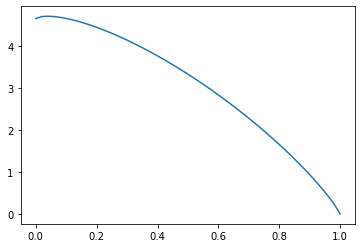

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from week1 import entropy

Pas=np.linspace(0, 1, num=51)

C = 26

plt.plot(Pas, [ entropy(probabilityVector(pa, C)) for pa in Pas])


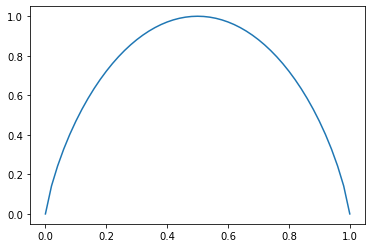

In [101]:
C = 26

plt.plot(Pas, [ entropy(probabilityVector(pa, 2)) for pa in Pas])

Exception: The sum of the elements of p should be = 1: [0.       0.333333 0.333333 0.333333]

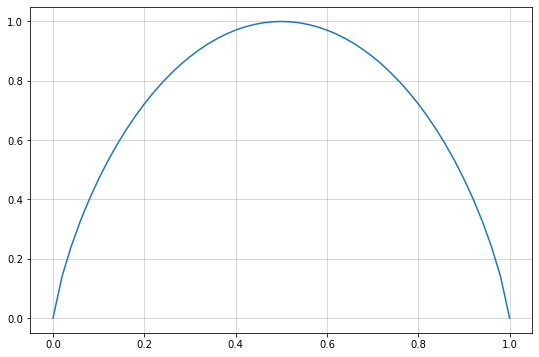

In [102]:
fig, axs = plt.subplots(1, 1, figsize=(9, 6))  
axs.grid(linestyle='-', linewidth=0.5)
for c in range(2,26,2):
    axs.plot(Pas, [ entropy(probabilityVector(pa, c)) for pa in Pas])
axs.set_title('H(P) vs P(a)')
axs.set_xticks(np.arange(0, 1, 0.05))
axs.set_xlabel('P(a)')
plt.legend()
plt.show()


# Week1 Challenge - Probability distribution of letter in a text
Take a look at the probability distribution of each letter of the alphabet (plus a space) gleaned from a sample text as displayed in Figure 2.1 (section 2.1) of Mackay

In [122]:
alphabet = ['a',
'b',
'c',
'd',
'e',
'f',
'g',
'h',
'i',
'j',
'k',
'l',
'm',
'n',
'o',
'p',
'q',
'r',
's',
't',
'u',
'v',
'w',
'x',
'y',
'z',
'_']
pSymbol = [0.0575,
0.0128,
0.0263,
0.0285,
0.0913,
0.0173,
0.0133,
0.0313,
0.0599,
0.0006,
0.0084,
0.0335,
0.0235,
0.0596,
0.0689,
0.0192,
0.0008,
0.0508,
0.0567,
0.0706,
0.0334,
0.0069,
0.0119,
0.0073,
0.0164,
0.0007,
0.19259999]

In [116]:
print(pSymbol)

[0.0575, 0.0128, 0.0263, 0.0285, 0.0913, 0.0173, 0.0133, 0.0313, 0.0599, 0.0006, 0.0084, 0.0335, 0.0235, 0.0596, 0.0689, 0.0192, 0.0008, 0.0508, 0.0567, 0.0706, 0.0334, 0.0069, 0.0119, 0.0073, 0.0164, 0.0007, 0.1925]


In [123]:
print(np.sum(pSymbol))

0.9999999900000001


## Calculate and display the Shannon information content for each letter (and space).

In [105]:
from week1  import infocontent, entropy
import numpy as np

In [118]:
infocontentAlphabet = [infocontent(p) for p in pSymbol]

In [119]:
print(infocontentAlphabet)

[4.120294233717712, 6.28771237954945, 5.248793390257147, 5.132894270497346, 3.4532413295652273, 5.853084151912725, 6.23242994404826, 4.997693532616831, 4.061300186760664, 10.702749878828293, 6.895394956770689, 4.899695094204315, 5.411195432984449, 4.0685438590872876, 3.859352206845158, 5.7027498788282935, 10.287712379549449, 4.299027692777283, 4.140507454607221, 3.8241880062782694, 4.904008087075397, 7.1791879227712805, 6.392894616241506, 7.097887820669432, 5.930160374931366, 10.480357457491845, 2.3770696490798233]


## What is the entropy of the letters (and spaces) - can you validate this is the weighted average of the Shannon information contents you computed?

In [108]:
entropyRecalc = np.sum(np.array([ a*b for (a,b) in zip(infocontentAlphabet,pSymbol) ]))

In [124]:
entropyWithFunction = entropy(pSymbol)

In [111]:
print(entropyRecalc)

4.108698089924512


In [112]:
print(entropyWithFunction)

4.754887502163468


????

## What does this mean about how many (good) questions you would need to ask on average in order to guess a letter sampled from this distribution?

We need to ask on average 4.1 yes/no questions

In [ ]:
filename = './data/Seinfeld-scripts-textOnly.txt'
with open(filename, 'rt') as f:
    text = f.read()

In [ ]:
text.lower()[0:200]

In [ ]:
import string
string.punctuation

words = ' '.join(text.lower().split())

In [ ]:
import re
p = re.compile('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]*')

In [ ]:
processedStr = p.sub('', ' '.join(text.lower().split()))

In [ ]:
sample = [ char for char in processedStr]
print(sample[1:50])

In [ ]:
from week1 import entropyEmpirical
entropyEmpirical(sample)

## How does this compare to the stated value from Mackay (Links to an external site.) in Table 2.9 (sec 2.3; or see slide 26 of our lecture) as estimated from "The Frequently Asked Questions Manual for Linux"? Did you expect it to be the same, and why or why not?  

Just about the same. (4.09 vs 4.1)



## compute the Shannon information content of each character, and again compare these to those quoted by Mackay.

In [125]:
import collections
itemscount = collections.Counter(sample)

# probability = # item x / # total number of items
dist = [x/sum(itemscount.values()) for x in itemscount.values()]
shannonInfoContent = [infocontent(x/sum(itemscount.values())) for x in itemscount.values()]
for i, j in zip(itemscount.keys(), shannonInfoContent):
    print("{} : {}".format(i, j))


xbar : 1.0
acling : 1.0


In [126]:
import string
import re

filename = './data/Seinfeld-scripts-textOnly.txt'
with open(filename, 'rt') as f:
    text = f.read()
        
p = re.compile('[!"#\$%&\'\(\)\*\+\,-\.\/:;<=>\?@[\\\^_`{\|}~0-9]*')
processedStr = p.sub('', ' '.join(text.lower().split()))
#print(processedStr)

In [127]:
samples = [[char1, char2] for char1, char2 in list(zip(processedStr[slice(0, None, 1)], processedStr[slice(1, None, 1)])) ]

In [128]:
from week1 import jointEntropyEmpirical
jointEntropyEmpirical(samples)

7.453543202601456

In [129]:
from week1 import conditionalEntropyEmpirical
conditionalEntropyEmpirical(samples)

3.3665982758754556